In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns

/usr/local/lib/python2.7/dist-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._traversal import breadth_first_order, depth_first_order, \
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:169: R

/usr/local/lib/python2.7/dist-packages/scipy/cluster/hierarchy.py:178: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _hierarchy, _optimal_leaf_ordering


In [2]:
import random
import sys
import copy
from igraph import *
import time
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
g = Graph.Read_Ncol("CA-GrQc.txt", directed = False)
A = g.get_edgelist()
nxg = nx.Graph(A)

In [4]:
with open('centralidades.txt', 'rb') as f:
    my_list2 = pickle.load(f)

In [5]:
X = np.array(my_list2)
X = X.transpose()
X = stats.zscore(X)
X.shape

(5242, 7)

In [6]:
varience_values = []

pca = PCA(n_components=1,svd_solver='full')
teste = pca.fit_transform(X)
explained_varience = pca.explained_variance_ratio_.sum()
print(float(pca.explained_variance_ratio_.sum()*100))
print(pca.explained_variance_ratio_,len(pca.explained_variance_ratio_))
print(pca.singular_values_,len(pca.singular_values_))  

52.5657647754
(array([0.52565765]), 1)
(array([138.88297853]), 1)


In [7]:
lista_teste = teste.tolist()
len(lista_teste)

5242

In [8]:
#  a partir daqui é so pegar os index igual no que ja tem
flat_list = []
for sublist in lista_teste:
    for item in sublist:
        flat_list.append(item)
        
len(flat_list)
# print(flat_list[:50])

5242

In [9]:
n = 50
vindex = [i for i in range(g.vcount())]
aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
print(seeds_PCA[:50])
# len(vindex)

[1037, 577, 11, 288, 53, 207, 20, 108, 186, 101, 279, 72, 295, 103, 147, 244, 545, 365, 363, 1088, 346, 77, 100, 369, 465, 353, 396, 265, 1032, 303, 300, 1066, 282, 457, 296, 1515, 230, 36, 1091, 1733, 159, 102, 269, 2065, 1284, 359, 285, 315, 543, 375]


In [10]:
my_list = X
# my_list[0] = grau
# my_list[1] = betweenness
# my_list[2] = pagerank
# my_list[3] = closeness
# my_list[4] = eigenvector_centrality
# my_list[5] = harmonic_centrality
# my_list[6] = load_centrality 
# ...etc
aflat, seeds_grau = (list(x) for x in zip(*sorted(zip(my_list[:,0], vindex), reverse=True)))
aflat, seeds_betweennes = (list(x) for x in zip(*sorted(zip(my_list[:,1], vindex), reverse=True)))
aflat, seeds_pagerank = (list(x) for x in zip(*sorted(zip(my_list[:,2], vindex), reverse=True)))
aflat, seeds_closeness = (list(x) for x in zip(*sorted(zip(my_list[:,3], vindex), reverse=True)))
aflat, seeds_eigenvector_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,4], vindex), reverse=True)))
aflat, seeds_harmonic_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,5], vindex), reverse=True)))
aflat, seeds_load_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,6], vindex), reverse=True)))
l = [seeds_grau,seeds_betweennes,seeds_pagerank,seeds_closeness,seeds_eigenvector_centrality,seeds_harmonic_centrality,seeds_load_centrality]
print(l[0][:50])

[101, 295, 279, 103, 77, 72, 296, 288, 265, 100, 159, 285, 1284, 282, 302, 275, 263, 262, 269, 300, 303, 301, 277, 267, 259, 221, 297, 280, 261, 299, 294, 290, 264, 284, 273, 1037, 577, 293, 292, 291, 289, 286, 283, 278, 276, 274, 270, 266, 545, 1278]


In [11]:
# SIMILARIDADE ENTRE AS SEMENTES DO PCA E AS OUTRAS
#  seeds_PCA FOI FEITO COM A MATRIZ TODA

In [12]:
def calcKendall(matrix):
    matrix_kendall = []
    for i in range(matrix.shape[1]):
        kend = []
        for j in range(matrix.shape[1]):
            tau, p_value = kendalltau(matrix[:,i],matrix[:,j])
            kend.append(tau)
        matrix_kendall.append(kend)
    matrix_kendall = np.array(matrix_kendall)
    return(matrix_kendall)


In [13]:
def calcSpearman(matrix):
    tau,p_value = spearmanr(matrix)
    matrix_spearman = np.array(tau)
    return(matrix_spearman)

In [14]:
# SELECIONANDO PARES DE COLUNAS DE ALTA E BAIXA CORRELACAO PARA USAR NO PCA

In [15]:
matrix_kendall = calcKendall(X)
print(matrix_kendall)

[[1.         0.57185314 0.58721285 0.45151019 0.41243435 0.46440414
  0.57150763]
 [0.57185314 1.         0.52957422 0.42997674 0.33544209 0.43394043
  0.99595293]
 [0.58721285 0.52957422 1.         0.07900353 0.03292889 0.08723392
  0.5292732 ]
 [0.45151019 0.42997674 0.07900353 1.         0.73374608 0.980198
  0.429671  ]
 [0.41243435 0.33544209 0.03292889 0.73374608 1.         0.74194635
  0.33510951]
 [0.46440414 0.43394043 0.08723392 0.980198   0.74194635 1.
  0.43360445]
 [0.57150763 0.99595293 0.5292732  0.429671   0.33510951 0.43360445
  1.        ]]


In [16]:
[1.         0.57185314 0.58721285 0.45151019 0.41243435 0.46440414 0.57150763]
[0.57185314 1.         0.52957422 0.42997674 0.33544209 0.43394043 0.99595293]
[0.58721285 0.52957422 1.         0.07900353 0.03292889 0.08723392 0.5292732 ]
[0.45151019 0.42997674 0.07900353 1.         0.73374608 0.980198   0.429671  ]
[0.41243435 0.33544209 0.03292889 0.73374608 1.         0.74194635 0.33510951]
[0.46440414 0.43394043 0.08723392 0.980198   0.74194635 1.         0.43360445]
[0.57150763 0.99595293 0.5292732  0.429671   0.33510951 0.43360445 1.        ]

SyntaxError: invalid syntax (<ipython-input-16-45385b255eab>, line 1)

In [16]:
matrix_spearman = (calcSpearman(X))
print(matrix_spearman)

[[1.         0.67570943 0.73122294 0.59042723 0.54467012 0.6060633
  0.67558465]
 [0.67570943 1.         0.66762163 0.55427283 0.43849521 0.55904682
  0.99994645]
 [0.73122294 0.66762163 1.         0.13269871 0.06974803 0.14563111
  0.66739304]
 [0.59042723 0.55427283 0.13269871 1.         0.89638367 0.9991819
  0.55420544]
 [0.54467012 0.43849521 0.06974803 0.89638367 1.         0.90248899
  0.43826029]
 [0.6060633  0.55904682 0.14563111 0.9991819  0.90248899 1.
  0.55895756]
 [0.67558465 0.99994645 0.66739304 0.55420544 0.43826029 0.55895756
  1.        ]]


In [ ]:
[1.         0.67570943 0.73122294 0.59042723 0.54467012 0.6060633  0.67558465]
[0.67570943 1.         0.66762163 0.55427283 0.43849521 0.55904682 0.99994645]
[0.73122294 0.66762163 1.         0.13269871 0.06974803 0.14563111 0.66739304]
[0.59042723 0.55427283 0.13269871 1.         0.89638367 0.9991819  0.55420544]
[0.54467012 0.43849521 0.06974803 0.89638367 1.         0.90248899 0.43826029]
[0.6060633  0.55904682 0.14563111 0.9991819  0.90248899 1.         0.55895756]
[0.67558465 0.99994645 0.66739304 0.55420544 0.43826029 0.55895756 1.        ]

Pense neste plot como um mapa de calor de correlacao baseado na correlação em kendall e spearman
Nao, na verdade é exatamente isso que é.
Repare que os plots sao iguais

In [17]:
labels_medidas = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality']

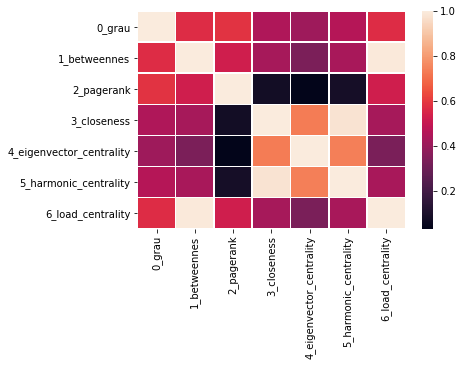

In [18]:
sns.heatmap(matrix_kendall,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)


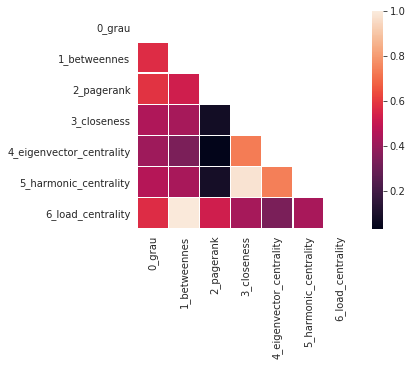

In [19]:
corr = matrix_kendall
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

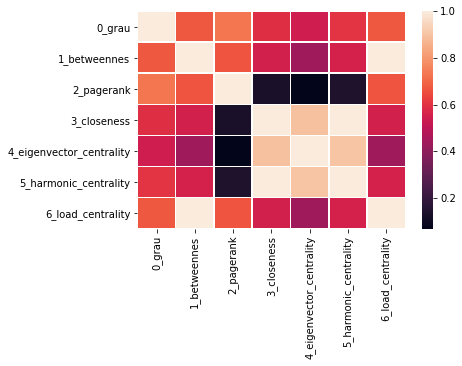

In [20]:
sns.heatmap(matrix_spearman,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

In [21]:
def calcula_PCA(matrix,col1,col2): # pca entre duas colunas
    
    Y = np.array([matrix[:,col1],matrix[:,col2]])
    Y = Y.transpose()
#     print (Y.shape)
#     print (Y,type(Y),type(Y[0]),len(Y[0]))
    
    pca = PCA(n_components=1,svd_solver='full')
    teste = pca.fit_transform(Y)
    explained_varience = pca.explained_variance_ratio_.sum()
    print(float(pca.explained_variance_ratio_.sum()*100))
    lista_teste = teste.tolist()
    flat_list = []
    for sublist in lista_teste:
        for item in sublist:
            flat_list.append(item)
    aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
    return (seeds_PCA,np.array(flat_list))

Selecionando as posicoes amarelas e azuis dos plots (exceto a diagonal principal). Esta selecoes mudarao de grafo para grafo

In [22]:
matrix_teste = X

In [23]:
# Alta correlacao
c_1_6 = calcula_PCA(matrix_teste,1,6)
c_3_4 = calcula_PCA(matrix_teste,3,4)
c_3_5 = calcula_PCA(matrix_teste,3,5)
c_4_5 = calcula_PCA(matrix_teste,4,5)

99.9748583788
56.9464574845
99.9657204557
57.9045872918


In [24]:
# Baixa correlacao
c_2_3 = calcula_PCA(matrix_teste,2,3)
c_2_4 = calcula_PCA(matrix_teste,2,4)
c_2_5 = calcula_PCA(matrix_teste,2,5)

57.2350583211
65.977822331
58.4498622044


In [48]:
# np.append(matrix_teste,c_1_6[0],axis = 1 )

In [51]:
c_2_3

([108,
  1037,
  577,
  11,
  295,
  186,
  53,
  103,
  101,
  279,
  1733,
  1032,
  20,
  1243,
  31,
  365,
  288,
  363,
  72,
  207,
  450,
  1088,
  457,
  346,
  369,
  315,
  370,
  100,
  396,
  296,
  1091,
  77,
  244,
  465,
  545,
  45,
  265,
  230,
  27,
  2009,
  375,
  1066,
  543,
  984,
  746,
  159,
  398,
  2065,
  285,
  322,
  353,
  757,
  41,
  256,
  2138,
  1515,
  146,
  359,
  1118,
  263,
  269,
  418,
  658,
  1731,
  73,
  2029,
  123,
  350,
  282,
  1284,
  606,
  1011,
  848,
  147,
  569,
  119,
  1069,
  467,
  67,
  102,
  1137,
  253,
  1426,
  1620,
  44,
  275,
  300,
  303,
  504,
  1040,
  979,
  302,
  333,
  262,
  241,
  988,
  968,
  744,
  40,
  818,
  397,
  1636,
  808,
  15,
  306,
  685,
  1564,
  1410,
  3037,
  578,
  524,
  390,
  758,
  996,
  36,
  1370,
  2182,
  1070,
  343,
  776,
  252,
  214,
  149,
  301,
  135,
  954,
  1056,
  228,
  376,
  259,
  261,
  1371,
  1176,
  1407,
  1320,
  972,
  19,
  277,
  675,
  452,
  2

In [26]:
x = np.array([[10,20,30], [40,50,60]])
y = np.array([[100, 200]])
y = y.transpose()
x = np.hstack((x,y))
print(x,x.shape)
# a = np.zeros((6,2))
# b = np.zeros((6,1))
# np.hstack((a,b))

(array([[ 10,  20,  30, 100],
       [ 40,  50,  60, 200]]), (2, 4))


In [27]:
j = np.array([c_2_3[1]]).transpose()
print(j.shape)


(5242, 1)


In [28]:
#  adicionando na matrix temporaria
matrix_teste = np.hstack((matrix_teste, np.array([c_1_6[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_4_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_2_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_2_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_2_5[1]]).transpose()))
matrix_teste.shape

(5242, 14)

In [29]:
labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','16','34','35','45','23','24','25']

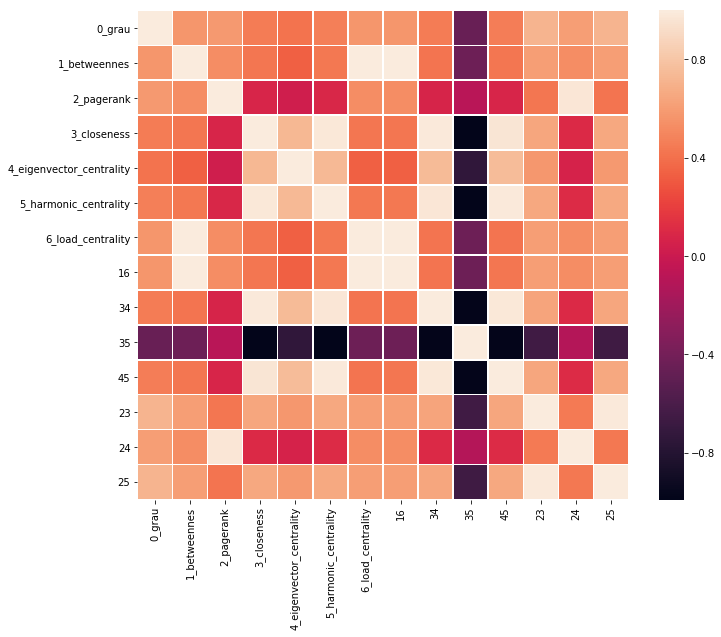

In [30]:
# 
plt.figure(figsize=(11,9))
sns.heatmap(calcKendall(matrix_teste),xticklabels=labels,yticklabels=labels,linewidths=.5)

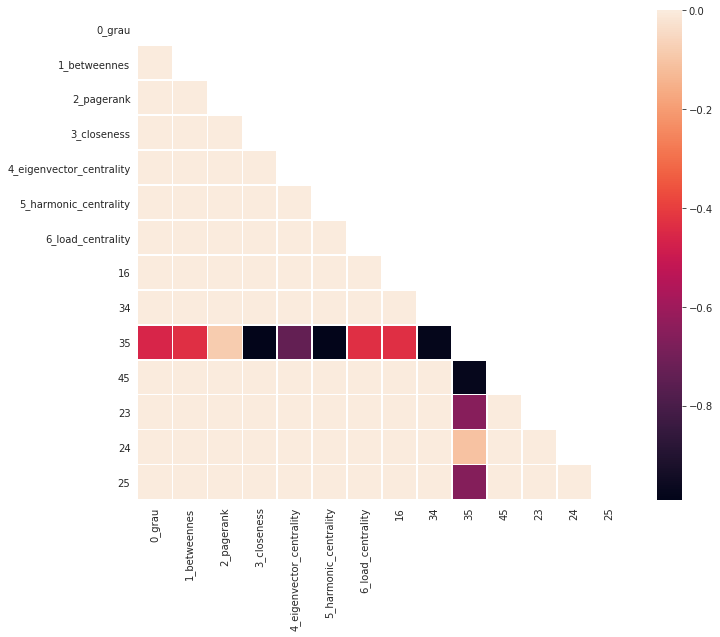

In [31]:
plt.figure(figsize=(11,9))
corr = calcKendall(matrix_teste)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.0, square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

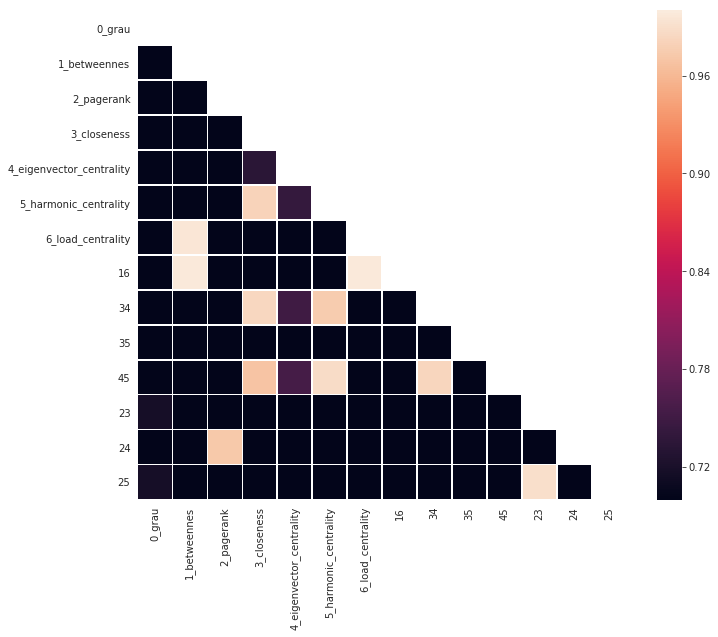

In [32]:
plt.figure(figsize=(11,9))
corr = calcKendall(matrix_teste)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin=.7, square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

In [33]:
#  COLOCAR ISSO URGENTEMENTE NUM DATAFRAME

In [34]:
import pandas as pd

import seaborn as sns

In [35]:
len(labels)

14

In [36]:
# escrevendo data frame com as 100 primeiras sementes, ordenadas e suas centralidades 
d = {'col1':[1] , 'col2': [2]}
df = pd.DataFrame(data=d)
df


,col1,col2
0,1,2


In [37]:
# corr = stats.zscore(corr)
# plt.figure(figsize=(11,9))
# sns.heatmap(calcKendall(matrix_teste),xticklabels=labels,yticklabels=labels,linewidths=.5)

In [38]:
medidas_novas = [c_1_6,c_3_4,c_3_5,c_4_5,c_2_3,c_2_4,c_2_5]
for i in medidas_novas:
    l.append(i)


In [39]:
d = {'0_grau' : seeds_grau[:100],'1_betweennes':seeds_betweennes[:100],
     '2_pagerank' :seeds_pagerank[:100],'3_closeness':seeds_closeness[:100],
     '4_eigenvector_centrality':seeds_eigenvector_centrality[:100],'5_harmonic_centrality':seeds_harmonic_centrality[:100],
     '6_load_centrality':seeds_load_centrality[:100],'m_1_6':c_1_6[0][:100],
     'm_34':c_3_4[0][:100],'m_35':c_3_5[0][:100],
     'm_45':c_4_5[0][:100],'m_23':c_2_3[0][:100],
     'm_24':c_2_4[0][:100],'m_25':c_2_5[0][:100]}


In [40]:
df = pd.DataFrame(data=d)
df.head()

,0_grau,1_betweennes,2_pagerank,3_closeness,4_eigenvector_centrality,5_harmonic_centrality,6_load_centrality,m_1_6,m_23,m_24,m_25,m_34,m_35,m_45
0,101,1037,108,1037,101,1037,1037,1037,108,295,108,101,5111,101
1,295,11,1037,147,265,288,207,207,1037,101,1037,265,5238,279
2,279,207,577,11,279,101,11,11,577,279,577,279,5237,265
3,103,53,11,288,296,279,53,53,11,103,11,296,5236,288
4,77,577,186,244,77,11,20,20,295,288,295,77,5235,77


In [41]:
df.corr()

,0_grau,1_betweennes,2_pagerank,3_closeness,4_eigenvector_centrality,5_harmonic_centrality,6_load_centrality,m_1_6,m_23,m_24,m_25,m_34,m_35,m_45
0_grau,1.000000,0.129217,0.154737,-0.079455,0.249863,0.090433,0.341746,0.182783,0.058150,0.354303,0.133350,0.322973,-0.804575,0.403174
1_betweennes,0.129217,1.000000,-0.000697,-0.120104,0.201155,0.147473,0.067082,0.193167,-0.027109,0.065662,0.026414,0.121508,-0.288173,0.108298
2_pagerank,0.154737,-0.000697,1.000000,-0.145390,0.116471,0.135732,0.023612,0.049812,-0.070515,0.043663,-0.097861,0.145181,-0.217616,-0.009657
3_closeness,-0.079455,-0.120104,-0.145390,1.000000,-0.016639,0.041999,-0.159111,-0.168147,-0.015803,0.144760,-0.071848,-0.023812,0.016988,-0.049486
4_eigenvector_centrality,0.249863,0.201155,0.116471,-0.016639,1.000000,0.055910,0.206643,0.189512,-0.071732,0.194268,0.046866,0.122657,-0.369066,0.014651
5_harmonic_centrality,0.090433,0.147473,0.135732,0.041999,0.055910,1.000000,0.171311,0.085473,-0.088601,0.078800,-0.008483,0.434082,-0.197599,-0.032695
6_load_centrality,0.341746,0.067082,0.023612,-0.159111,0.206643,0.171311,1.000000,0.345986,-0.036923,0.005737,0.080932,0.200648,-0.347486,0.100527
m_1_6,0.182783,0.193167,0.049812,-0.168147,0.189512,0.085473,0.345986,1.000000,0.055450,-0.099797,-0.003835,0.318194,-0.283362,0.206023
m_23,0.058150,-0.027109,-0.070515,-0.015803,-0.071732,-0.088601,-0.036923,0.055450,1.000000,0.161836,0.279621,0.029416,-0.133927,0.070488
m_24,0.354303,0.065662,0.043663,0.144760,0.194268,0.078800,0.005737,-0.099797,0.161836,1.000000,-0.074079,0.171622,-0.457600,0.307440


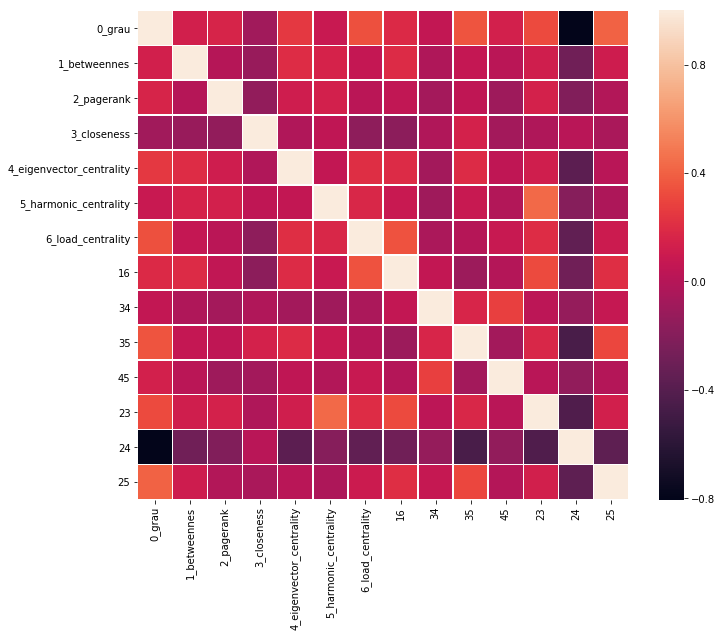

In [42]:
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(),xticklabels=labels,yticklabels=labels,linewidths=.5)

In [105]:
# df.to_csv('semente-CA-GrQcs.csv',sep='\t', encoding='utf-8')

In [52]:
sementes = [seeds_grau[:50],seeds_betweennes[:50],
            seeds_pagerank[:50],seeds_closeness[:50],
            seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
            seeds_load_centrality[:50],c_1_6[0][:50],
            c_3_4[0][:50],c_3_5[0][:50],
            c_4_5[0][:50],c_2_3[0][:50],
            c_2_4[0][:50],c_2_5[0][:50]]

In [53]:
with open('sementes-CA-GrQc.txt', 'wb') as f:
    pickle.dump(sementes, f)

In [62]:
sementes[-1]

[108,
 1037,
 577,
 11,
 295,
 186,
 103,
 53,
 101,
 279,
 1733,
 1032,
 20,
 288,
 72,
 1243,
 31,
 365,
 363,
 207,
 450,
 1088,
 457,
 346,
 100,
 369,
 315,
 370,
 296,
 77,
 396,
 244,
 1091,
 545,
 465,
 265,
 45,
 230,
 27,
 1066,
 2009,
 375,
 159,
 543,
 984,
 746,
 398,
 285,
 2065,
 322]

In [59]:
with open('sementes-CA-GrQc.txt', 'rb') as f:
    t2 = pickle.load(f)